# Importing Libraries

In [6]:
from scipy.stats import t

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
1-t.cdf((70-65)/(4/np.sqrt(2)),df=1)

0.16386782498092456

In [3]:
1-t.cdf((70-65)/(4/np.sqrt(10)),df=9)

0.001670134201011364

# Simulations

In [7]:
def simulate_two_gaussians(n_samples, n_simulations=1000, mu1=0, mu2=1, s1=1, s2=1):
    samples_1 = [np.random.normal(loc=mu1, scale=s1, size=n_samples) for i in range(n_simulations )]
    means_1 = np.mean(samples_1, axis=1)
    
    samples_2 = [np.random.normal(loc=mu2, scale=s2, size=n_samples) for i in range(n_simulations)]
    means_2 = np.mean(samples_2, axis=1)

    
    sns.histplot(means_1, bins=50, color="red")
    sns.histplot(means_2, bins=50, color="blue")
    plt.show()
    sns.kdeplot(means_1, color="red")
    sns.kdeplot(means_2, color="blue")
    plt.axvline(means_1.mean(), color="red",linestyle="--")
    plt.axvline(means_2.mean(), color="blue",linestyle="--")
   

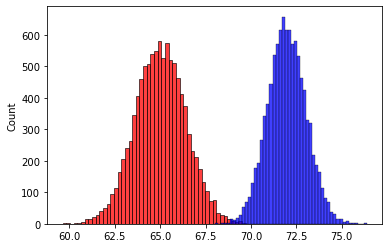

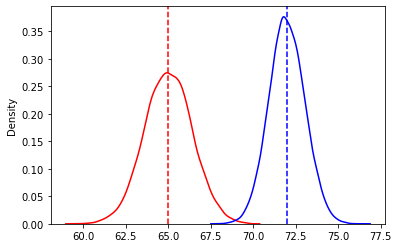

In [39]:
n_samples = 8
n_simulations = 10000
mu1 = 65
mu2 = 72
s1 = 4
s2 = 3
simulate_two_gaussians(n_samples=n_samples, n_simulations=n_simulations, mu1=mu1, mu2=mu2, s1=s1, s2=s2)

# Standardisation and Normalisation

In [16]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Weight', ylabel='Height'>

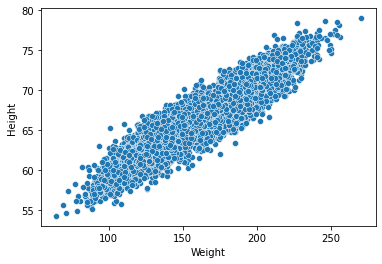

In [19]:
sns.scatterplot(x=df["Weight"],y=df["Height"])

In [20]:
df["Weight_standard"]= (df["Weight"]-df["Weight"].mean())/df["Weight"].std()
df["Height_standard"]= (df["Height"]-df["Height"].mean())/df["Height"].std()

<AxesSubplot:xlabel='Weight_standard', ylabel='Height_standard'>

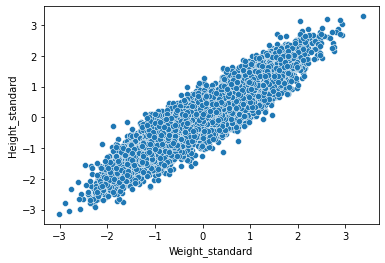

In [21]:
sns.scatterplot(x=df["Weight_standard"],y=df["Height_standard"])

In [22]:
df["Weight_Normalised"]= (df["Weight"]-df["Weight"].min())/(df["Weight"].max()-df["Weight"].min())
df["Height_Normalised"]= (df["Height"]-df["Height"].min())/(df["Height"].max()-df["Height"].min())

<AxesSubplot:xlabel='Weight_Normalised', ylabel='Height_Normalised'>

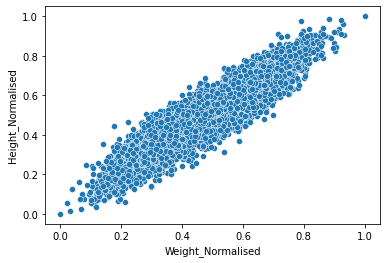

In [23]:
sns.scatterplot(x=df["Weight_Normalised"],y=df["Height_Normalised"])

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [27]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [28]:
df1.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [30]:
df1.drop(columns=["Gender"],inplace=True)

In [31]:
df1_m=StandardScaler().fit_transform(df1)

In [32]:
df1_m

array([[ 1.94406149,  2.50579697],
       [ 0.62753668,  0.02710064],
       [ 2.01244346,  1.59780623],
       ...,
       [-0.64968792, -1.02672965],
       [ 0.69312469,  0.07512745],
       [-1.14970831, -1.48850724]])

<AxesSubplot:>

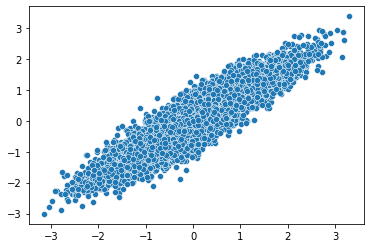

In [34]:
sns.scatterplot(x=df1_m[:,0],y=df1_m[:,1])

In [35]:
df2_m=MinMaxScaler().fit_transform(df1)

<AxesSubplot:>

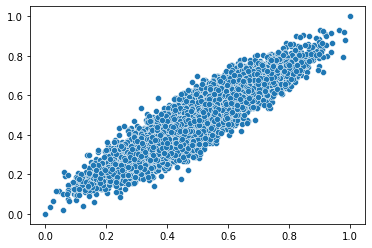

In [36]:
sns.scatterplot(x=df2_m[:,0],y=df2_m[:,1])